<a href="https://colab.research.google.com/github/airsresincrop/AIRS/blob/master/AIRS_tf_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/tensorflow/addons.git@r0.9

  Cloning https://github.com/tensorflow/addons.git (to revision r0.9) to /tmp/pip-req-build-u9d0ch2y
  Running command git clone -q https://github.com/tensorflow/addons.git /tmp/pip-req-build-u9d0ch2y
  Running command git checkout -b r0.9 --track origin/r0.9
  Switched to a new branch 'r0.9'
  Branch 'r0.9' set up to track remote branch 'r0.9' from 'origin'.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tensorflow-addons: filename=tensorflow_addons-0.9.1-cp36-cp36m-linux_x86_64.whl size=695081 sha256=31c70bb53c6a94be02ab526466d909e2fffc2b1b4a72da2445b224a880e4de85
  Stored in directory: /tmp/pip-ephem-wheel-cache-0_zc70id/wheels/8d/3c/6f/64f88683ae94f4dcee40b075b416cdc67fb349b289445a1906
Successfully built tensorflow-addons
  Found existing installation: tensorflow-addons 0.9.0.dev0
    Uninstalling tensorflow-addons-0.9.0.dev0:
      Successfully uninstalled tensorflow-addons-0.9.0.dev

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
counter = 2

In [0]:
number = 1024

In [0]:
!cp drive/My\ Drive/data/AIRS_{number}.zip AIRS_{number}.zip
!unzip -q AIRS_{number}.zip
!rm AIRS_{number}.zip

In [0]:
def unet(input_size = (None, None, 3), lr = 1e-3, loss = 'mean_squared_error', last_act = 'softmax', kern_size = 3, conv_factor = 1, metrics = ['accuracy']):

    inputs = layers.Input(input_size)
    conv1 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = layers.Conv2D(256 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = layers.Conv2D(256 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = layers.Conv2D(512 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = layers.Conv2D(512 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = layers.Conv2D(1024 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = layers.Conv2D(1024 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    up6 = layers.Conv2D(512 // conv_factor, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layers.UpSampling2D(size = (2,2))(drop5))
    merge6 = layers.concatenate([drop4,up6], axis = 3)
    conv6 = layers.Conv2D(512 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = layers.Conv2D(512 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = layers.Conv2D(256 // conv_factor, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layers.UpSampling2D(size = (2,2))(conv6))
    merge7 = layers.concatenate([conv3,up7], axis = 3)
    conv7 = layers.Conv2D(256 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = layers.Conv2D(256 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = layers.Conv2D(128 // conv_factor, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layers.UpSampling2D(size = (2,2))(conv7))
    merge8 = layers.concatenate([conv2,up8], axis = 3)
    conv8 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = layers.Conv2D(64 // conv_factor, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layers.UpSampling2D(size = (2,2))(conv8))
    merge9 = layers.concatenate([conv1,up9], axis = 3)
    conv9 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = layers.Conv2D(2, 1, activation = last_act, padding = 'same', kernel_initializer = 'he_normal')(conv9)

    model = models.Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = optimizers.Adam(lr = lr), loss = loss, metrics = metrics)

    return model

def unet_1(input_size = (None, None, 3), lr = 1e-3, loss = 'mean_squared_error', last_act = 'softmax', kern_size = 3, conv_factor = 1, metrics = ['accuracy']):

    inputs = layers.Input(input_size)
    conv1 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = layers.Conv2D(256 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = layers.Conv2D(256 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    drop3 = layers.Dropout(0.5)(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(drop3)
    
    conv4 = layers.Conv2D(512 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = layers.Conv2D(512 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)

    up7 = layers.Conv2D(256 // conv_factor, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layers.UpSampling2D(size = (2,2))(drop4))
    merge7 = layers.concatenate([conv3,up7], axis = 3)
    conv7 = layers.Conv2D(256 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = layers.Conv2D(256 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = layers.Conv2D(128 // conv_factor, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layers.UpSampling2D(size = (2,2))(conv7))
    merge8 = layers.concatenate([conv2,up8], axis = 3)
    conv8 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = layers.Conv2D(64 // conv_factor, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layers.UpSampling2D(size = (2,2))(conv8))
    merge9 = layers.concatenate([conv1,up9], axis = 3)
    conv9 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = layers.Conv2D(2, 1, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = layers.Activation(last_act, dtype='float32', name='predictions')(conv10)

    model = models.Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = optimizers.Adam(lr = lr), loss = loss, metrics = metrics)

    return model

def unet_2(input_size = (None, None, 3), lr = 1e-3, loss = 'mean_squared_error', last_act = 'softmax', kern_size = 3, conv_factor = 1, metrics = ['accuracy']):

    inputs = layers.Input(input_size)
    conv1 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    drop2 = layers.Dropout(0.5)(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(drop2)
    
    conv3 = layers.Conv2D(256 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = layers.Conv2D(256 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    drop3 = layers.Dropout(0.5)(conv3)

    up8 = layers.Conv2D(128 // conv_factor, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layers.UpSampling2D(size = (2,2))(drop3))
    merge8 = layers.concatenate([conv2,up8], axis = 3)
    conv8 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = layers.Conv2D(64 // conv_factor, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layers.UpSampling2D(size = (2,2))(conv8))
    merge9 = layers.concatenate([conv1,up9], axis = 3)
    conv9 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = layers.Conv2D(2, 1, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = layers.Activation(last_act, dtype='float32', name='predictions')(conv10)

    model = models.Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = optimizers.Adam(lr = lr), loss = loss, metrics = metrics)

    return model

def unet_3(input_size = (None, None, 3), lr = 1e-3, loss = 'mean_squared_error', last_act = 'softmax', kern_size = 3, conv_factor = 1, metrics = ['accuracy']):

    inputs = layers.Input(input_size)
    conv1 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    drop1 = layers.Dropout(0.5)(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(drop1)
    
    conv2 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = layers.Conv2D(128 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    drop2 = layers.Dropout(0.5)(conv2)

    up9 = layers.Conv2D(64 // conv_factor, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layers.UpSampling2D(size = (2,2))(drop2))
    merge9 = layers.concatenate([conv1,up9], axis = 3)
    conv9 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = layers.Conv2D(64 // conv_factor, kern_size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = layers.Conv2D(2, 1, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = layers.Activation(last_act, dtype='float32', name='predictions')(conv10)

    model = models.Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = optimizers.Adam(lr = lr), loss = loss, metrics = metrics)

    return model

In [0]:
from pathlib import Path
import shutil
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from random import shuffle
import cv2
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import itertools
import pickle
import os
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.mixed_precision import experimental as mixed_precision
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, Callback
import tensorflow_addons as tfa

In [0]:
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_policy(policy)

In [0]:
def get_input(filepath):
  image = plt.imread(filepath)
  return image

def get_output(filepath):
  label = plt.imread(filepath)
  return label

def preprocess_input(image):    
  return image/255

def preprocess_output(label):
  label = label[:,:,0].copy()
  # label[label==2] = 1
  label = np.stack([1-label,label],axis=-1)
  return label

def generator(files, batch_size=8):
  gen = iter(itertools.cycle(files))
  while True:
    yield [next(gen) for _ in range(batch_size)]

def image_generator(dataset, split = 'train', batch_size = 8):
  image_files = sorted([f.split('.')[0] for f in os.listdir(f'{dataset}/{split}/images') if 'jpg' in f])
  label_files = sorted([f.split('.')[0] for f in os.listdir(f'{dataset}/{split}/labels') if 'tif' in f])
  assert image_files == label_files
  files = image_files
  gen = generator(files, batch_size=batch_size)
  while True:
    batch_paths = next(gen)
    batch_input = []
    batch_output = []

    for input_path in batch_paths:
      inputs = get_input(filepath = f'{dataset}/{split}/images/{input_path}.jpg')
      output = get_output(filepath = f'{dataset}/{split}/labels/{input_path}.tif')
      inputs = preprocess_input(image = inputs)
      output = preprocess_output(label = output)
      batch_input += [inputs]
      batch_output += [output]

    batch_x = np.array(batch_input)
    batch_y = np.array(batch_output)

    yield (batch_x, batch_y)

In [0]:
dataset = f'/content/full_data/AIRS_{number}/crop_512'
batch_size = 16

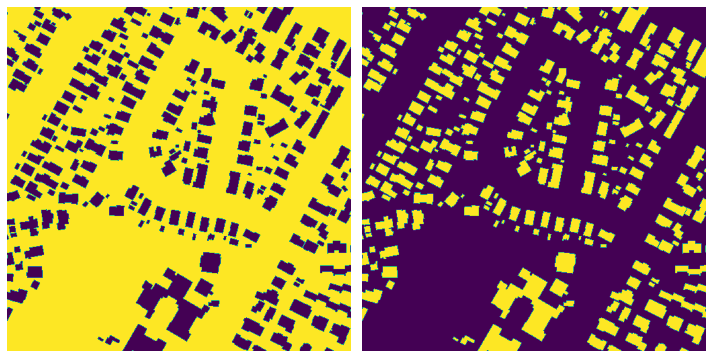

In [8]:
img = plt.imread(dataset+'/train/labels/0.tif')[:,:,0].copy()
fig = plt.figure(figsize=(10,10))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.imshow((img==i).astype(np.uint8)*255)
  plt.axis('off')
  plt.tight_layout()
fig.patch.set_facecolor('white')

In [9]:
for split in ['train', 'val', 'test']:
  for label in ['images', 'labels']:
    length = len([f for f in os.listdir(f'{dataset}/{split}/{label}') if 'jpg' in f or 'tif' in f])
    print(f'{split}_{label}: {length}')

train_images: 400
train_labels: 400
val_images: 80
val_labels: 80
test_images: 80
test_labels: 80


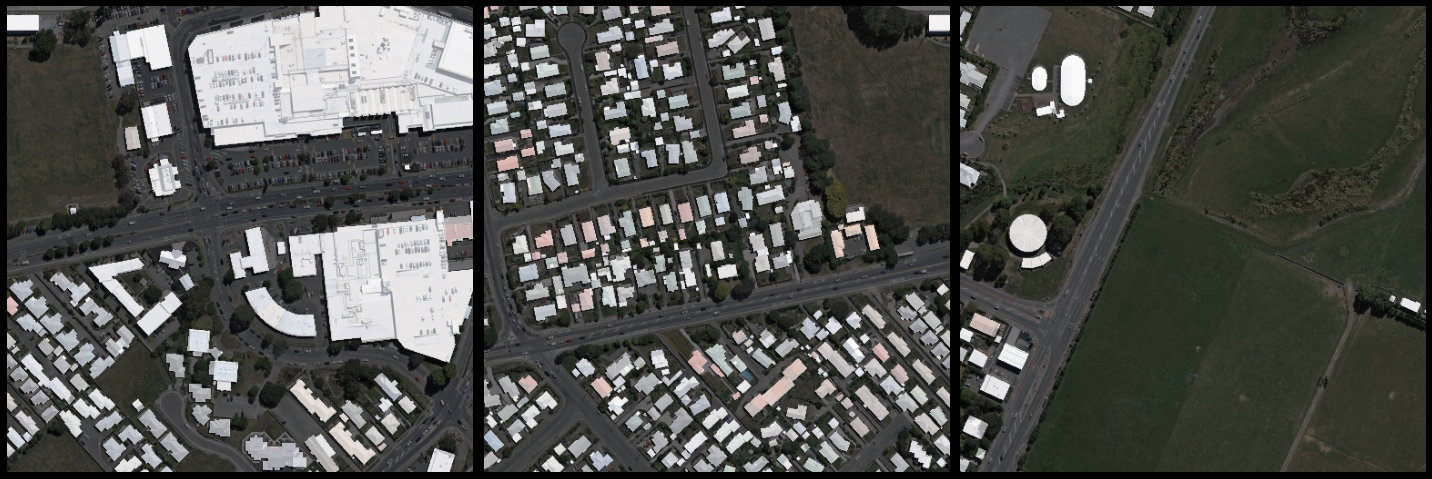

In [10]:
white_vals = []
names = [f.split('.')[0] for f in sorted(os.listdir(f'{dataset}/test/labels/'))]
for label in names:
    white_vals.append(np.sum(plt.imread(f'{dataset}/test/labels/{label}.tif')[:,:,0]))
min_idx, max_idx, med_idx = np.argmin(white_vals), np.argmax(white_vals), np.argsort(white_vals)[len(white_vals)//2]
fig = plt.figure(figsize=(20,20))
for i, idx in enumerate([max_idx, med_idx, min_idx]):
  plt.subplot(1,3,i+1)
  plt.imshow(plt.imread(f'{dataset}/test/images/{names[idx]}.jpg'), cmap='gray')
  plt.imshow(plt.imread(f'{dataset}/test/labels/{names[idx]}.tif')*255, cmap='gray',alpha=0.5)
  plt.axis('off')
  plt.tight_layout()
fig.patch.set_facecolor('black')

In [11]:
for conv_factor in [1,2,4,8,16,32,64]:
  print(f'Conv Factor: {conv_factor}')
  for model_func in [unet, unet_1, unet_2, unet_3]:
    modelname = str(model_func).split()[1]
    print(f'{modelname}: {model_func(conv_factor=conv_factor).count_params()}')

Conv Factor: 1
unet: 31032840
unet_1: 7698440
unet_2: 1863944
unet_3: 404872
Conv Factor: 2
unet: 7760648
unet_1: 1926152
unet_2: 467080
unet_3: 102088
Conv Factor: 4
unet: 1941384
unet_1: 482312
unet_2: 117320
unet_3: 25960
Conv Factor: 8
unet: 485960
unet_1: 120968
unet_2: 29608
unet_3: 6712
Conv Factor: 16
unet: 121800
unet_1: 30440
unet_2: 7544
unet_3: 1792
Conv Factor: 32
unet: 30608
unet_1: 7712
unet_2: 1960
unet_3: 508
Conv Factor: 64
unet: 7734
unet_1: 1982
unet_2: 530
unet_3: 160


In [12]:
train_gen = image_generator(dataset = dataset, split = 'train', batch_size = batch_size)
val_gen = image_generator(dataset = dataset, split = 'val', batch_size = batch_size)
test_gen = image_generator(dataset = dataset, split = 'test', batch_size = batch_size)

train_spe = len(os.listdir(f'{dataset}/train/images')) // batch_size
val_spe = len(os.listdir(f'{dataset}/val/images')) // batch_size
test_spe = len(os.listdir(f'{dataset}/test/images')) // batch_size
print(train_spe, val_spe, test_spe)

25 5 5


In [0]:
def soft_dice_loss(y_true, y_pred): 
    # skip the batch and class axis for calculating Dice score
    axes = tuple(range(1, len(y_pred.shape)-1))
    numerator = 2. * K.sum(y_pred * y_true, axes)
    denominator = K.sum(K.square(y_pred) + K.square(y_true), axes)
    return 1 - K.mean(numerator / (denominator + 1e-6))

def soft_dice_metric(y_true, y_pred):
    K_quant_preds = K.cast(K.argmin(y_pred, axis = -1),'float32')
    K_quant_preds = K.stack([K_quant_preds, 1- K_quant_preds],axis = -1)
    K_intersection = K.cast(K.all(K.stack([K_quant_preds, y_true], axis=0), axis=0),'int64')
    K_union = K.cast(K.any(K.stack([K_quant_preds, y_true], axis=0), axis=0),'int64')
    return (K.sum(K_intersection[:,:,:,1])/K.sum(K_union[:,:,:,1]) + K.sum(K_intersection[:,:,:,0])/K.sum(K_union[:,:,:,0]))/2

In [0]:
# x,y = next(train_gen)
# fig = plt.figure(figsize=(30,30))
# for i in range(0,16,2):
#   plt.subplot(4,4,i+1)
#   plt.imshow(x[i//2])
#   plt.imshow(y[i//2,:,:,0],alpha=0.5,cmap='gray')
#   plt.axis('off')
#   plt.tight_layout()
#   plt.subplot(4,4,i+2)
#   plt.imshow(x[i//2])
#   plt.imshow(y[i//2,:,:,1],alpha=0.5,cmap='gray')
#   plt.axis('off')
#   plt.tight_layout()
# fig.patch.set_facecolor('black')

In [0]:
last_act = 'softmax'
loss_func = 'dice'
loss = soft_dice_loss
metric_func = 'dice'
metrics = [soft_dice_metric]
modelname = 'unet_1'
dataset_name = '_'.join(dataset.split('/')[3:])
project_name = f'{dataset_name}_{modelname}_vary_cf_8to32'
max_attempts = 5

for conv_factor in [32,16,8]:
  vary = conv_factor
  print(f'Conv Factor: {conv_factor}')
  test_miou = 0
  attempts = 0
  #while test_miou < 0.5 and attempts < max_attempts:
  while attempts < max_attempts:
    print(f'Attempt #{attempts}')
    project_path = f'results/models/{project_name}/{vary}/{attempts}'
    Path(project_path).mkdir(parents=True, exist_ok=True)
    print(f'Models saved to {project_path}')
    monitor = 'val_soft_dice_metric'
    mntr = ''.join([first[0] for first in 'val_soft_dice_metric'.split('_')])
    weights_name = f'{modelname}_{last_act}_l:{loss_func}_m:{metric_func}_mntr:{mntr}_cf:{conv_factor}_og_{attempts}'
    #ckptname = f'{project_path}/{weights_name}'+'_epochs:{epoch:03d}_mIoU:{val_soft_dice_metric:.4f}.h5'
    ckptname = f'{project_path}/{weights_name}.h5'
    print('Checkpoint format: ' + ckptname)

    checkpointer = ModelCheckpoint(ckptname, monitor = monitor, mode = 'max', save_best_only = True, verbose = 0)
    earlystopper = EarlyStopping(monitor = monitor, mode = 'max', patience = 10, verbose = 0)
    reduceLR = ReduceLROnPlateau(monitor = monitor, mode = 'max', factor = 1/np.sqrt(10), patience = 5, cooldown = 1 ,verbose = 0)
    tqdmcb = tqdm_callback = tfa.callbacks.TQDMProgressBar(leave_epoch_progress=False)
    callbacks = [checkpointer, earlystopper, reduceLR, tqdmcb]

    epochs = 100
    model = unet_1(lr = 1e-2, loss = loss, last_act = last_act, conv_factor = conv_factor, metrics = metrics)
    history = model.fit(x = train_gen, steps_per_epoch = train_spe, epochs = epochs, validation_data = val_gen, validation_steps = val_spe, callbacks=callbacks, verbose = 0)

    history_path = f'results/hists/{project_name}/{vary}'
    Path(history_path).mkdir(parents = True, exist_ok = True)
    with open(f'{history_path}/hist_{weights_name}', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    print(f'Saved model history at {history_path}/hist_{weights_name}')

    #all_weights = sorted([f for f in os.listdir(project_path) if weights_name in f], key = lambda x: int(x[-18:-15]))
    #best_weights = project_path+'/'+all_weights[-1]
    #other_weights = all_weights[:-1]
    #[os.remove(project_path+'/'+f) for f in other_weights]
    best_weights = project_path + '/' + [f for f in os.listdir(project_path) if weights_name in f][0]
    model.load_weights(best_weights)
    print('Weights loaded from ' + best_weights)

    print('Evaluation on test set:')
    test_loss, test_miou = model.evaluate(x = test_gen, steps = test_spe, verbose = 0)
    print(f'Test Loss: {test_loss:.4f}\nTest mIoU: {test_miou:.4f}')
    attempts += 1
    if test_miou < 0.5:
      print('Test mIoU too less, retrying...')
      continue
    miou_path = f'results/mious/{project_name}/{vary}'
    Path(miou_path).mkdir(parents = True, exist_ok = True)
    val_loss, val_miou = model.evaluate(x = val_gen, steps = val_spe, verbose = 0)
    with open(f'{miou_path}/miou_{weights_name}_{test_miou:.4f}.txt', 'w') as miou_file:
      miou_file.write(f'{val_miou:.4f}\n')
      miou_file.write(f'{test_miou:.4f}\n')
    print(f'Saved model mIoUs at {miou_path}/miou_{weights_name}')
    max_img = plt.imread(f'{dataset}/test/images/{names[max_idx]}.jpg') / 255
    med_img = plt.imread(f'{dataset}/test/images/{names[med_idx]}.jpg') / 255
    min_img = plt.imread(f'{dataset}/test/images/{names[min_idx]}.jpg') / 255
    max_roof, med_roof, min_roof, _ = model.predict(np.stack([max_img, med_img, min_img, min_img]))
    max_roof = max_roof.argmax(-1)
    med_roof = med_roof.argmax(-1)
    min_roof = min_roof.argmax(-1)
    for m in ['max','med','min']:
        Path(f'results/outputs/{m}/{project_name}/{vary}').mkdir(parents = True, exist_ok = True)
    plt.imsave(f'results/outputs/max/{project_name}/{vary}/max_{weights_name}.jpg', max_roof, cmap='gray')
    plt.imsave(f'results/outputs/med/{project_name}/{vary}/med_{weights_name}.jpg', med_roof, cmap='gray')
    plt.imsave(f'results/outputs/min/{project_name}/{vary}/min_{weights_name}.jpg', min_roof, cmap='gray')
    print(f'Test outputs saved as results/outputs/***/{project_name}/***_{weights_name}.jpg')

Conv Factor: 32
Attempt #0
Models saved to results/models/AIRS_1024_crop_512_unet_1_vary_cf_8to32/32/0
Checkpoint format: results/models/AIRS_1024_crop_512_unet_1_vary_cf_8to32/32/0/unet_1_softmax_l:dice_m:dice_mntr:vsdm_cf:32_og_0.h5


Epoch 1/100


Epoch 2/100


Epoch 3/100


Epoch 4/100


Epoch 5/100


Epoch 6/100


Epoch 7/100


Epoch 8/100


Epoch 9/100


Epoch 10/100


Epoch 11/100


Epoch 12/100


Epoch 13/100


Epoch 14/100


Epoch 15/100


In [0]:
!zip -r -q results_{dataset_name}_{counter}.zip results/
!cp results_{dataset_name}_{counter}.zip drive/My\ Drive/keras_models/results_{dataset_name}_{counter}.zip
counter += 1

In [0]:
import shutil
shutil.rmtree('results')